In [ ]:
!pip install geopandas --quiet
!pip install mapclassify --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git

Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 133 (delta 24), reused 116 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 40.61 MiB | 25.25 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
!rm -r viz
!mv /content/G.A.I_MISCELLANEUS_RESOURCES/gis/viz viz

rm: cannot remove 'viz': No such file or directory


In [ ]:
grid = gpd.read_file('/content/viz/mexico_boundaries.gpkg', layer='hex_50km')
grid.head()

,id,bird_obs,bird_rich,bird_summ,bird_shan,bird_simp,bird_even,plnt_summ,plnt_obs,plnt_rich,...,edi,ita,eco_region,dist_to_city,dist_to_pa,pa,groups,rich_cat,total_obs,geometry
0,464,4008,155,"{'Accipiter': 23, 'Actitis': 68, 'Aechmophorus...",4.316211,52.739612,0.855809,"{'Abronia': 2, 'Achnatherum': 1, 'Acmispon': 9...",772,180,...,NaN,NaN,None,0.000000,114.322588,no_pa,0,low,5831,"POLYGON ((1021341.238 2343592.186, 1035774.995..."
1,515,2243,131,"{'Accipiter': 21, 'Actitis': 6, 'Aeronautes': ...",4.135867,42.111048,0.848349,"{'Abutilon': 2, 'Acacia': 2, 'Acmispon': 3, 'A...",1129,316,...,NaN,NaN,None,2.268621,91.003104,no_pa,0,low,3512,"POLYGON ((1064642.508 2368592.186, 1079076.265..."
2,516,18005,195,"{'Accipiter': 112, 'Actitis': 88, 'Aechmophoru...",4.518589,67.948922,0.856930,"{'': 2, 'Abronia': 7, 'Abutilon': 4, 'Acacia':...",5524,550,...,0.225489,0.38523,mediterranean,4.265146,64.322588,no_pa,2,medium,24653,"POLYGON ((1064642.508 2318592.186, 1079076.265..."
3,517,72257,207,"{'Accipiter': 643, 'Actitis': 346, 'Aechmophor...",4.432783,57.014540,0.831243,"{'': 2, 'Abies': 1, 'Abronia': 23, 'Abutilon':...",9529,629,...,NaN,NaN,None,52.133183,56.325225,no_pa,2,medium,84137,"POLYGON ((1064642.508 2268592.186, 1079076.265..."
4,518,25,23,"{'Accipiter': 1, 'Aphelocoma': 1, 'Aquila': 1,...",3.107972,21.551724,0.991222,"{'Acmispon': 6, 'Adenostoma': 3, 'Adiantum': 5...",828,216,...,NaN,NaN,None,102.066259,79.587332,no_pa,1,very low,921,"POLYGON ((1064642.508 2218592.186, 1079076.265..."


In [ ]:
grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            1056 non-null   int64   
 1   bird_obs      1056 non-null   int64   
 2   bird_rich     1056 non-null   int64   
 3   bird_summ     1056 non-null   object  
 4   bird_shan     1056 non-null   float64 
 5   bird_simp     1038 non-null   float64 
 6   bird_even     1027 non-null   float64 
 7   plnt_summ     1056 non-null   object  
 8   plnt_obs      1056 non-null   int64   
 9   plnt_rich     1056 non-null   int64   
 10  plnt_shan     1056 non-null   float64 
 11  plnt_simp     1048 non-null   float64 
 12  plnt_even     1046 non-null   float64 
 13  mamm_summ     1056 non-null   object  
 14  mamm_obs      1056 non-null   int64   
 15  mamm_rich     1056 non-null   int64   
 16  mamm_shan     1056 non-null   float64 
 17  mamm_simp     1025 non-null   float64 
 18  

<Axes: >

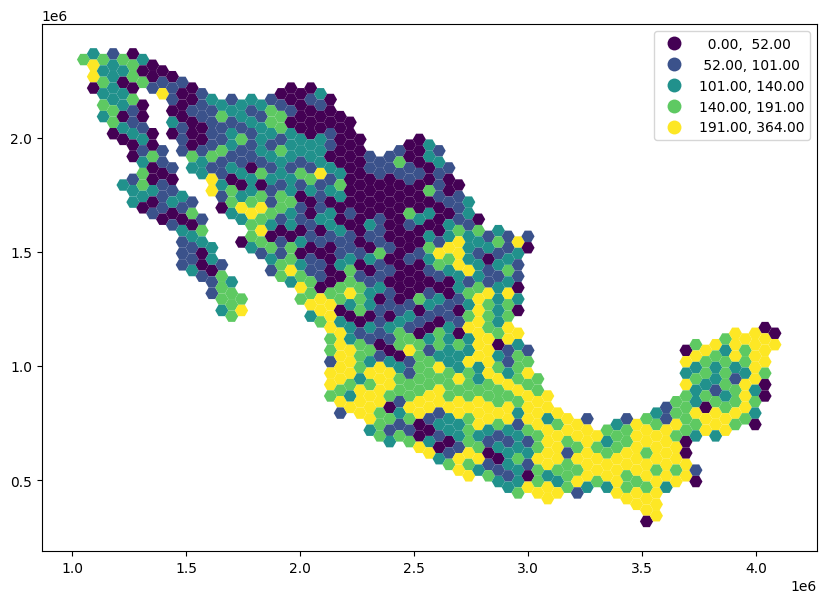

In [ ]:
grid.plot(column='bird_rich', scheme='quantiles', figsize=(10,10), legend=True)

We can plot a specific column by passinng the dataframe to the axis and specifying said column:

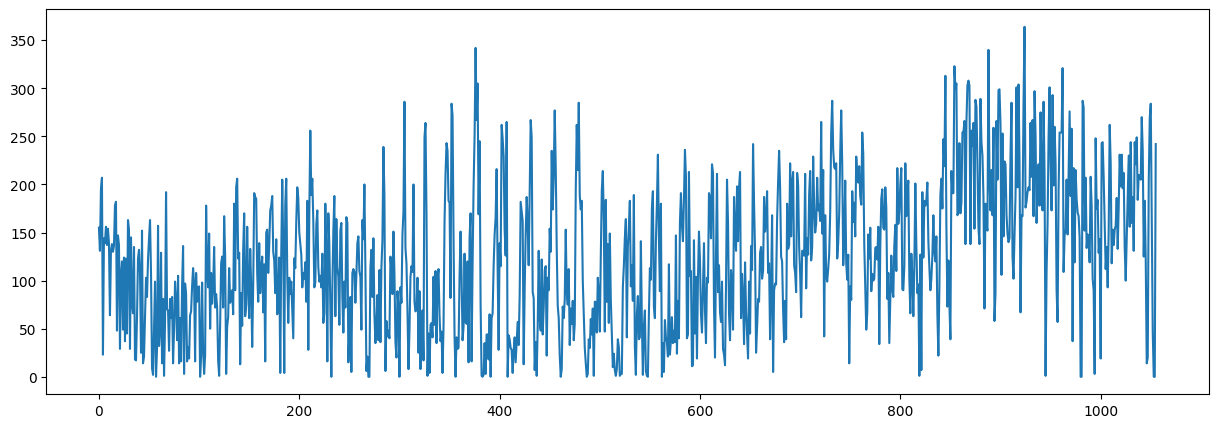

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('bird_rich', data=grid)

We can also specify the columns directly and pass it as a pandas series:

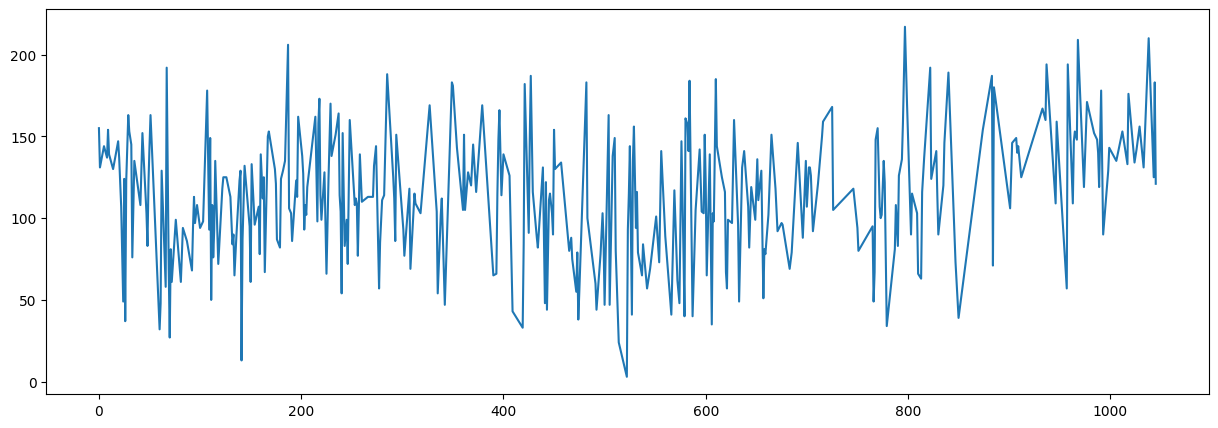

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot(grid[grid['rich_cat']=='low']['bird_rich']);

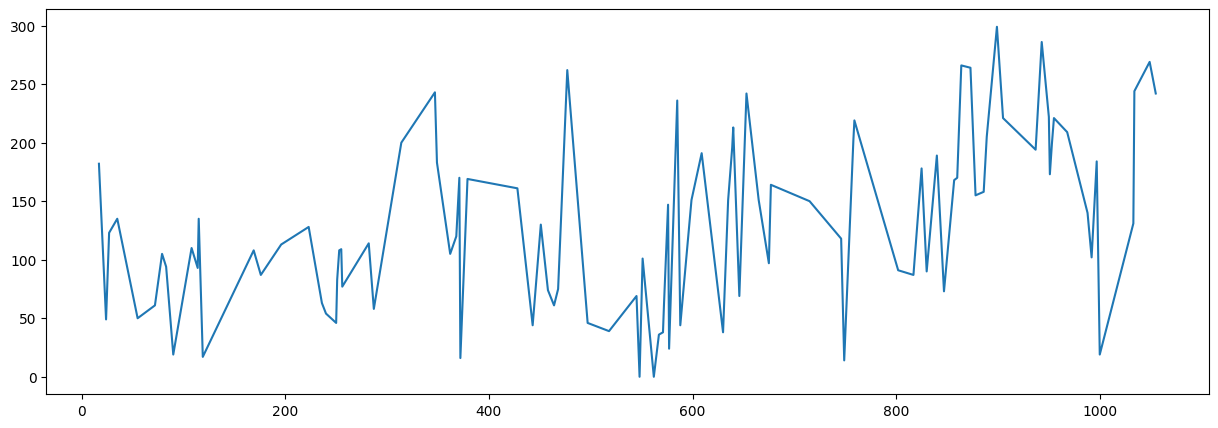

In [ ]:
# plot only a sample of the data
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('bird_rich', data=grid.sample(n=100).sort_index());

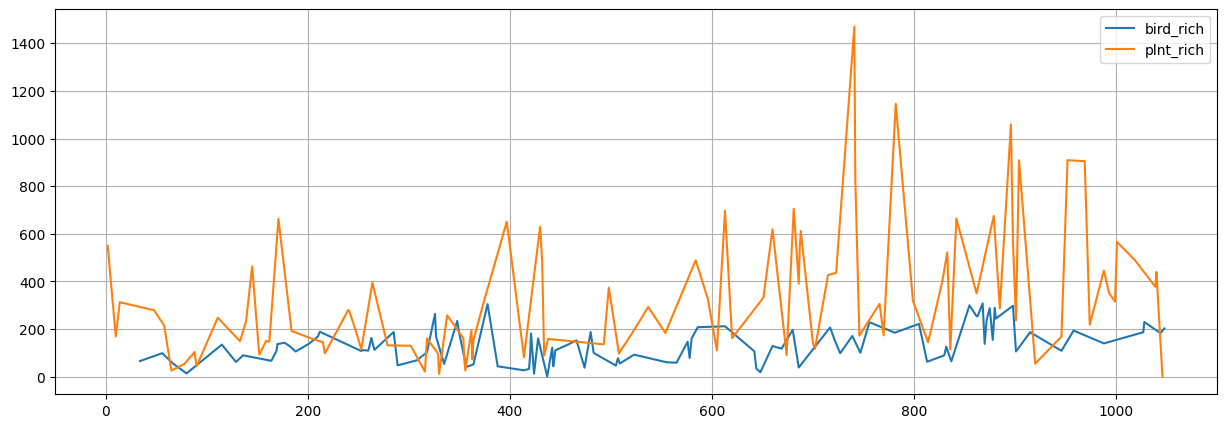

In [ ]:
# plot multuiple data series on the same axis
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.plot('bird_rich', data=grid.sample(n=100).sort_index())
ax.plot('plnt_rich', data=grid.sample(n=100).sort_index())
ax.legend()
ax.grid()

A closer look reveals that something is a little bit off.  The beginning and ending points are not the same.

We made two completely seperate samples and so we are plotting two completely different sets of data.  We can correct this by creating a subset named sample and then using that data set for both series.  Now we can see that as expected they are correlated.

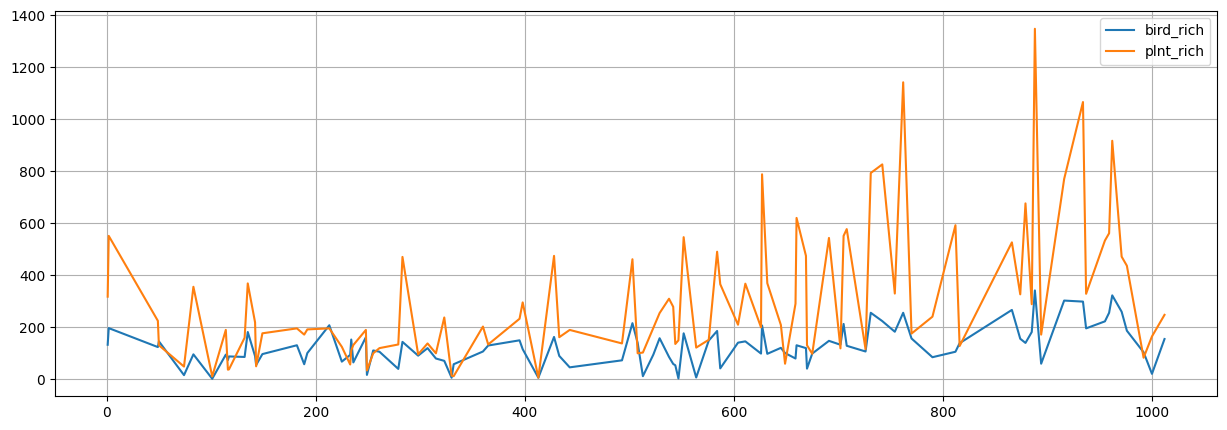

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

sample = grid.sample(n=100).sort_index()

ax.plot('bird_rich', data=sample)
ax.plot('plnt_rich', data=sample)
ax.legend()
ax.grid()

That was one way of showing multiple series on a single plot.  Another would be to have each series on its own subplot.  We can do this using the subplots method and specifying that we want 5 rows of subplots in a single column.

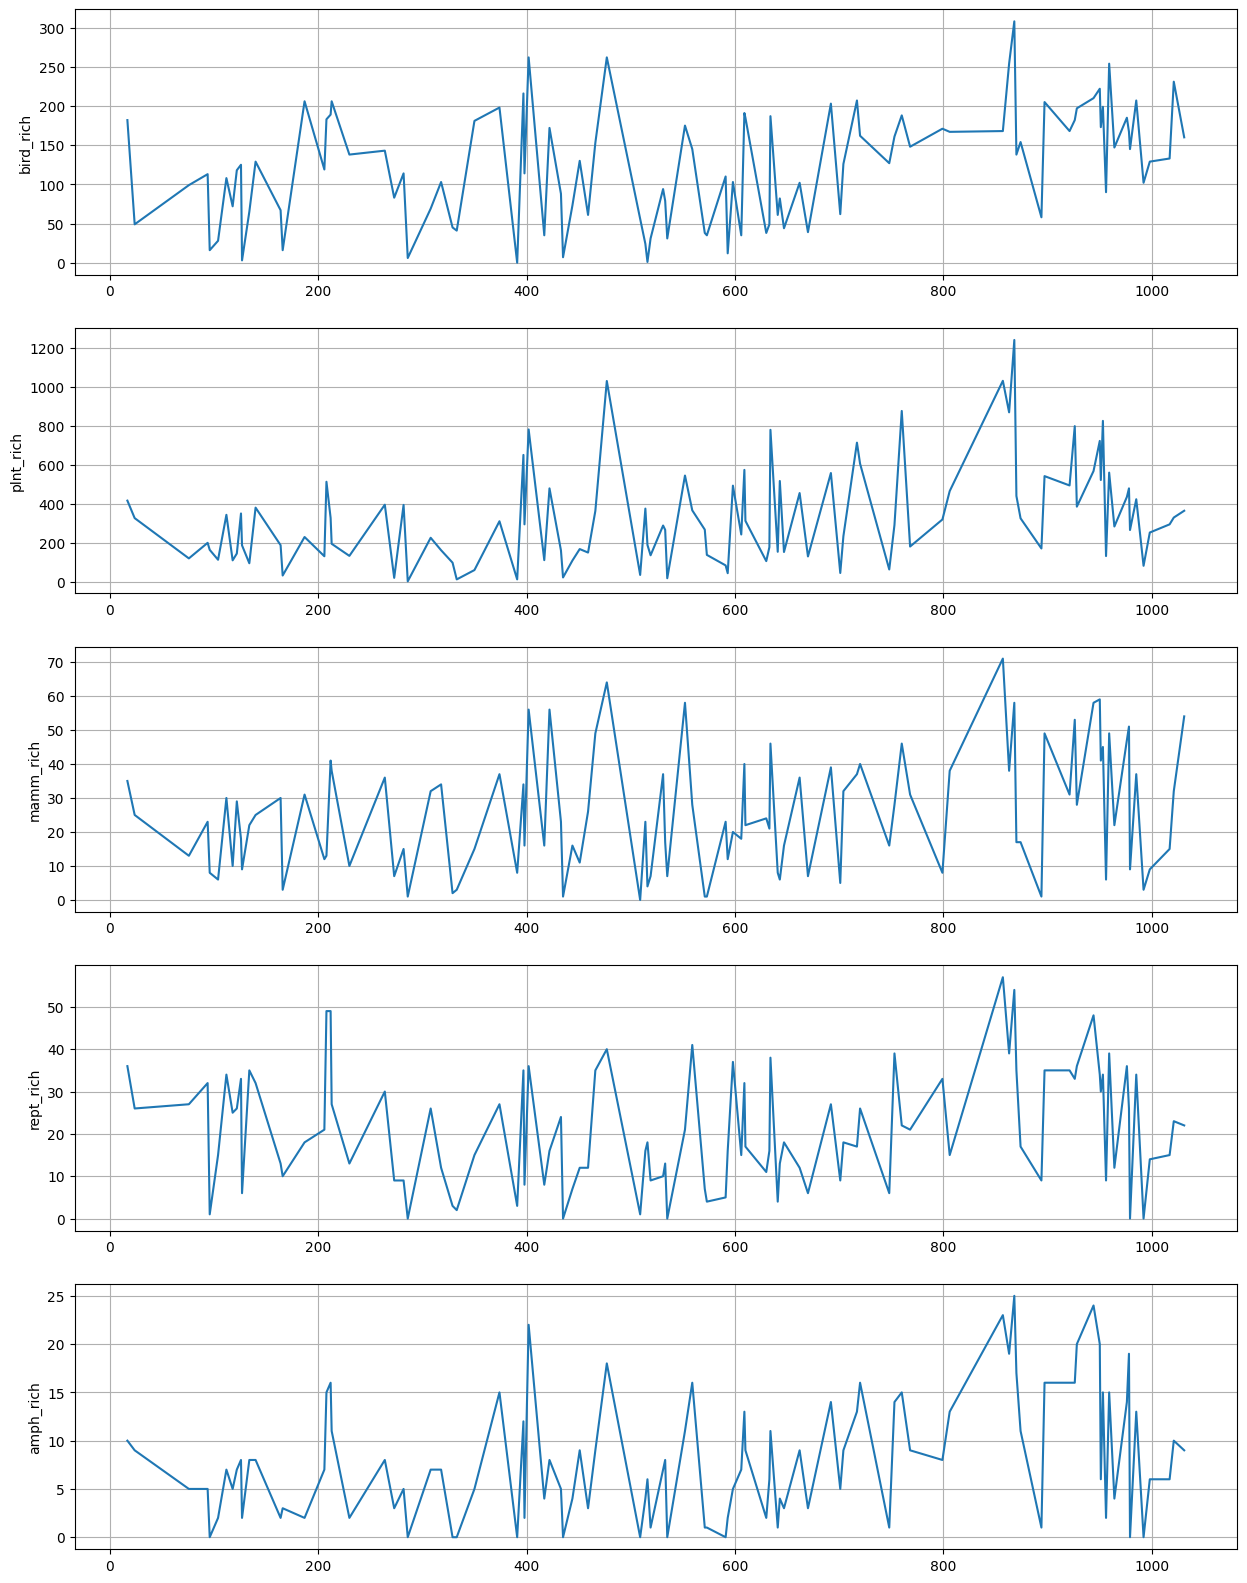

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(15, 20)

fields = ['bird_rich', 'plnt_rich', 'mamm_rich', 'rept_rich', 'amph_rich']

# the sample is specified as a fraction of the data rather than a concrete number
sample = grid.sample(frac=0.1).sort_index()

for x in range(0, 5):
    ax[x].plot(fields[x], data=sample)
    ax[x].set_ylabel(fields[x])
    ax[x].grid()

# Ploting 2 data series

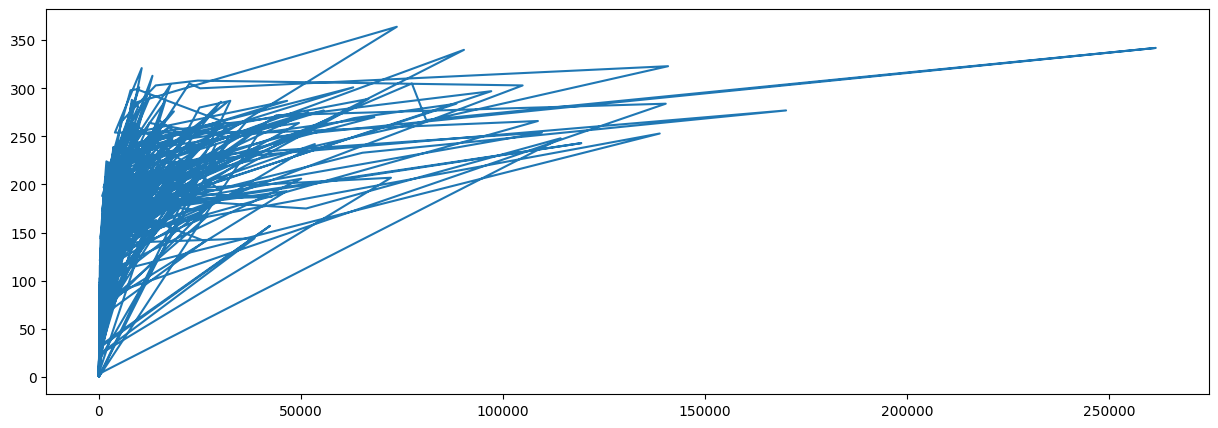

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('bird_obs', 'bird_rich', data=grid)

This is a bit of an ugly mess.  There are two ways to deal with this.  One would be to sort the dataframe by the series on the x_axis

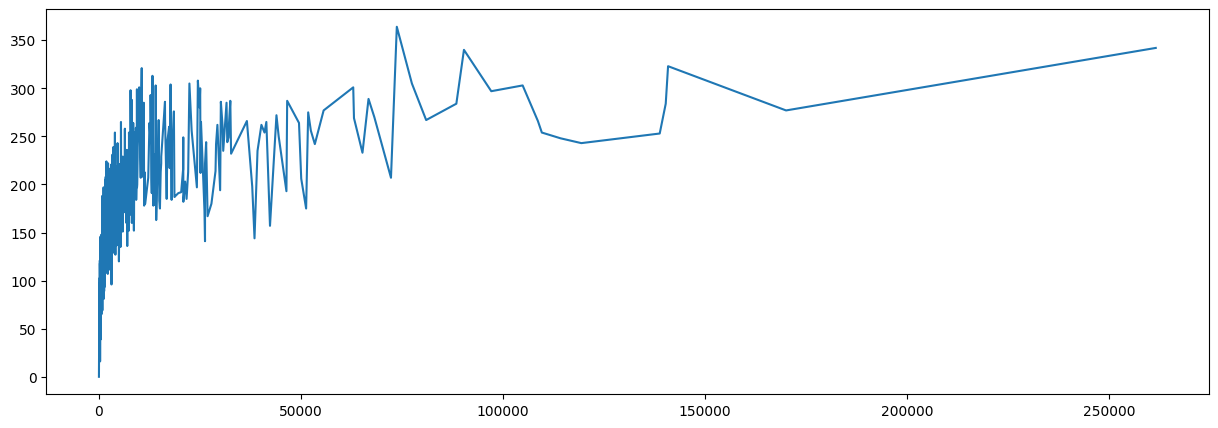

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('bird_obs', 'bird_rich', data=grid.sort_values('bird_obs'))

The other would be to eliminate the lines altogether and just plot the points.  We can do this using a format code that does not include a linetype.  The format code contains 1 character specifying the color, folowed by a character specifying the marker type, and possibly a character representing the line type.  Much more control over styling markers and lines is available through individual parameters and will be discussed further soon.

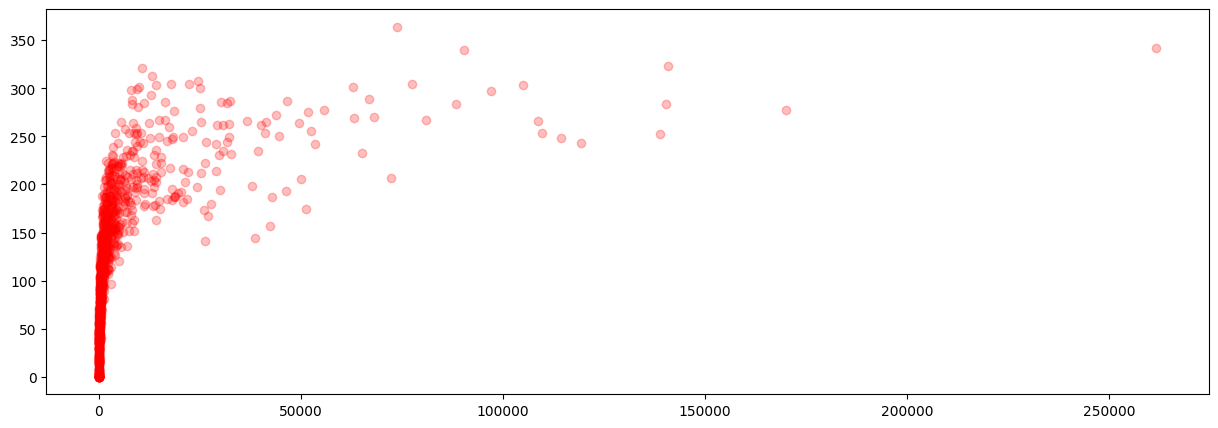

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('bird_obs', 'bird_rich', 'ro', data=grid, alpha=0.25)

Of course we can also plot multiple data series on a single axes as follows.

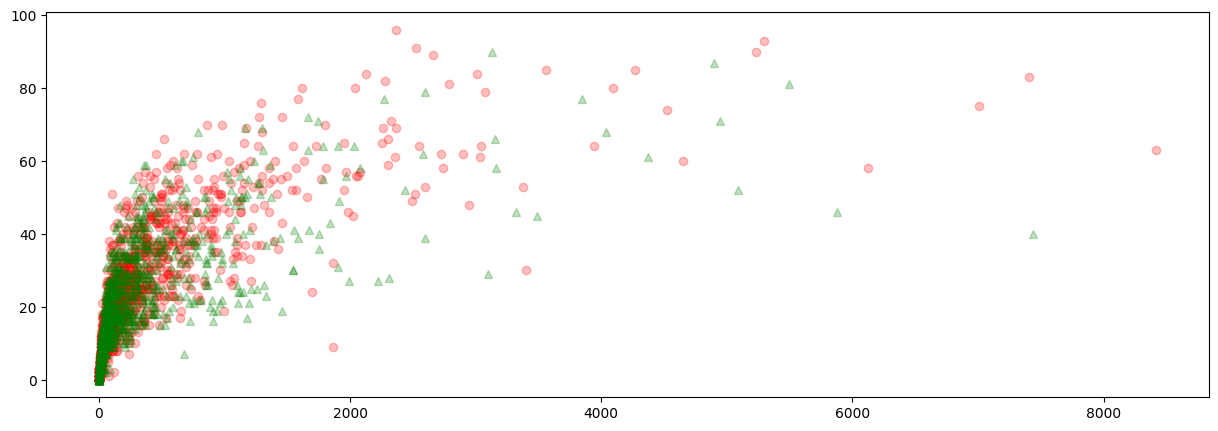

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('mamm_obs', 'mamm_rich', 'ro', data=grid, alpha=0.25);
ax.plot('rept_obs', 'rept_rich', 'g^', data=grid, alpha=0.25);

These kinds of patterns suggest that a log transformation of the X axis might be appropriate.  This can be done by setting the xscale property of the axes to the string 'log'

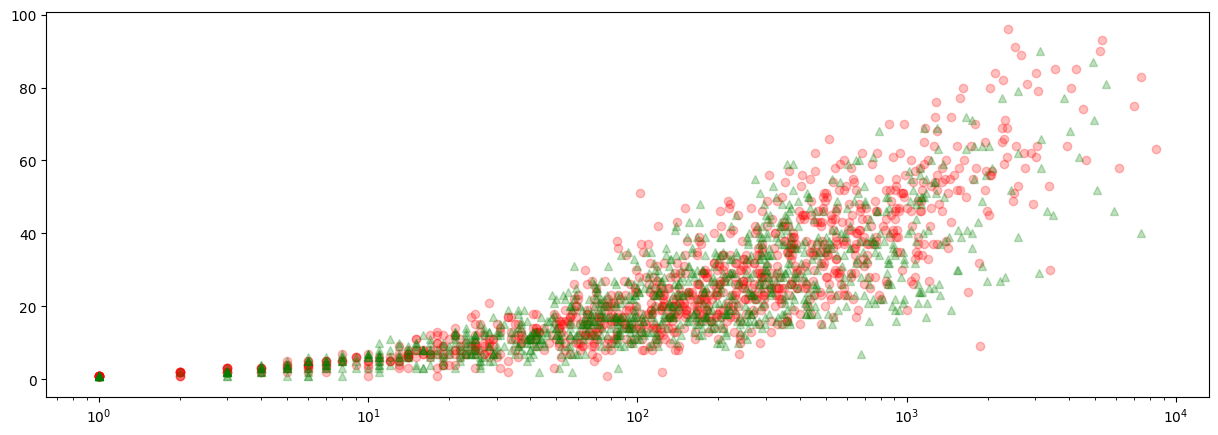

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot('mamm_obs', 'mamm_rich', 'ro', data=grid, alpha=0.25);
ax.plot('rept_obs', 'rept_rich', 'g^', data=grid, alpha=0.25);
ax.set_xscale('log')

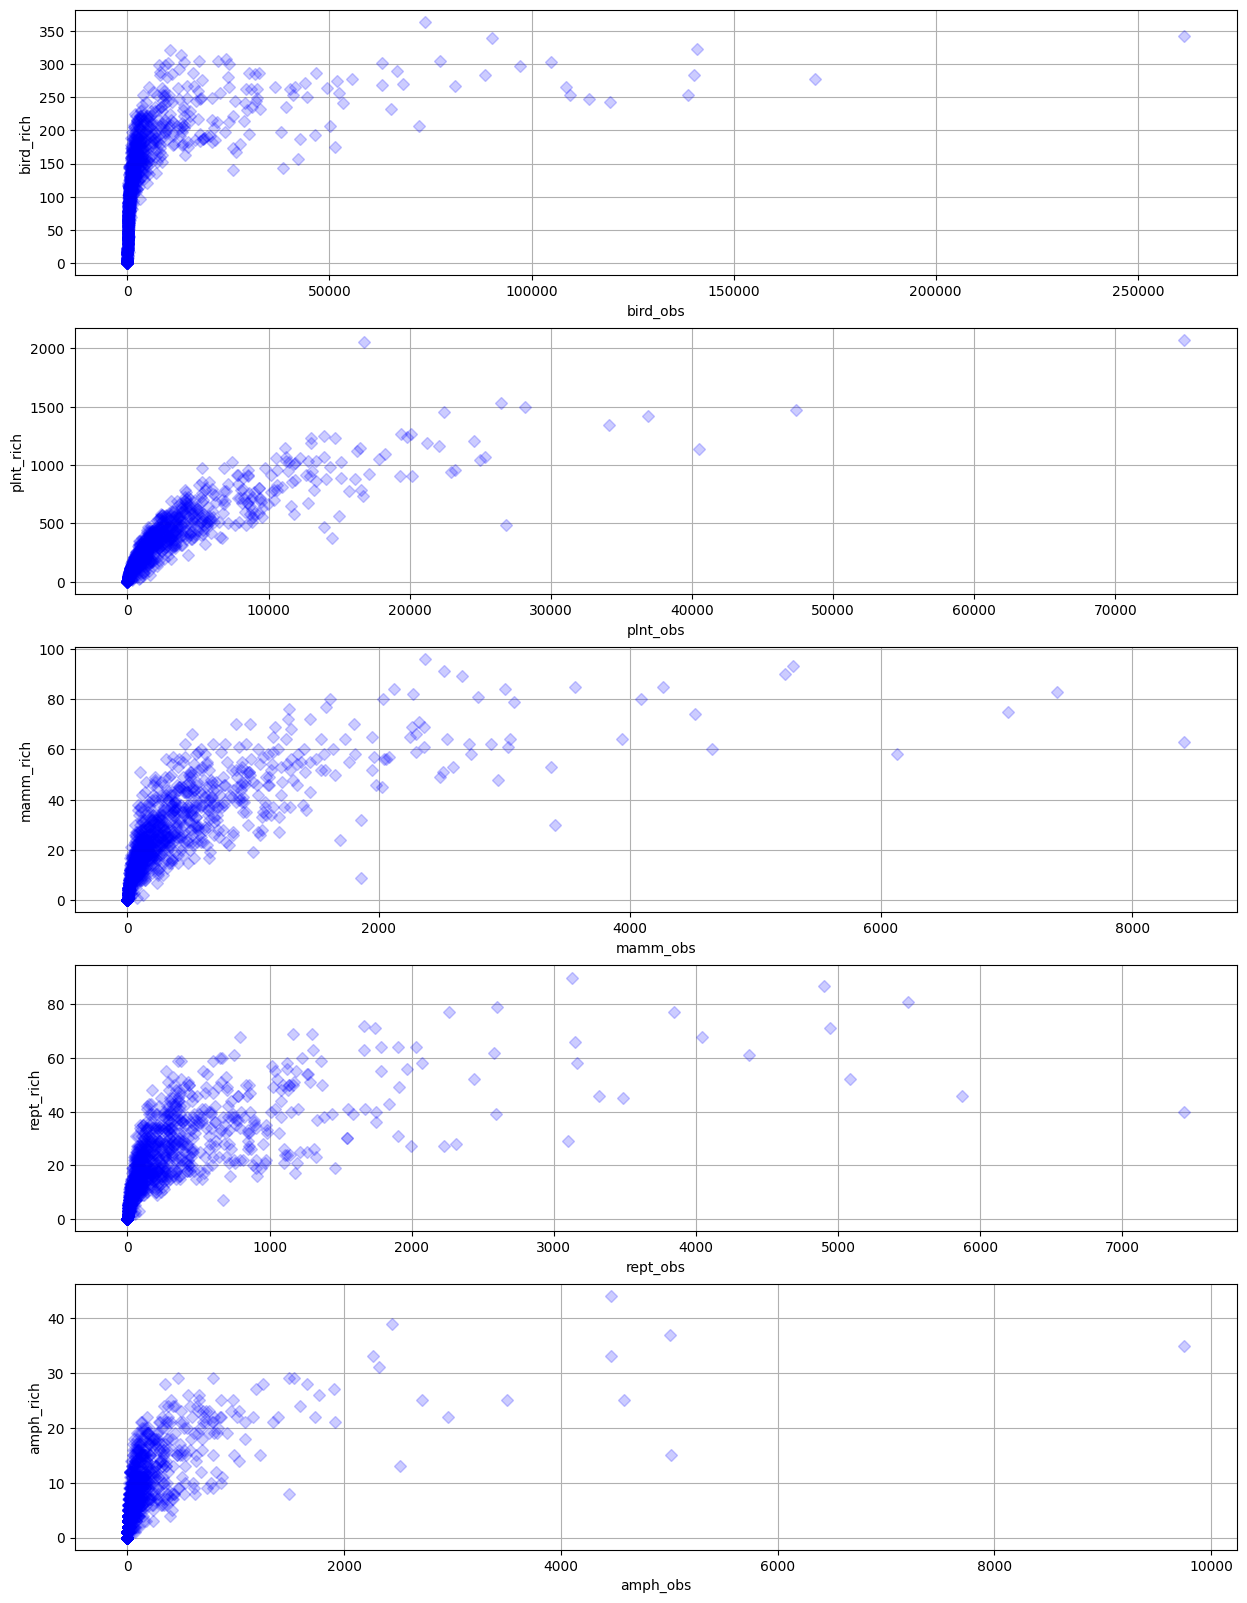

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(15, 20)

x_fields = ['bird_obs', 'plnt_obs', 'mamm_obs', 'rept_obs', 'amph_obs']
y_fields = ['bird_rich', 'plnt_rich', 'mamm_rich', 'rept_rich', 'amph_rich']

for x in range(0, 5):
    ax[x].plot(x_fields[x], y_fields[x], 'bD', data=grid, alpha=0.2)
    ax[x].set_ylabel(y_fields[x])
    ax[x].set_xlabel(x_fields[x])
    ax[x].grid()

Another possibility is to plot a matrix of the same 5 variables. This is a visual description of a correlation matrix, which we will discuss in more detail later on.

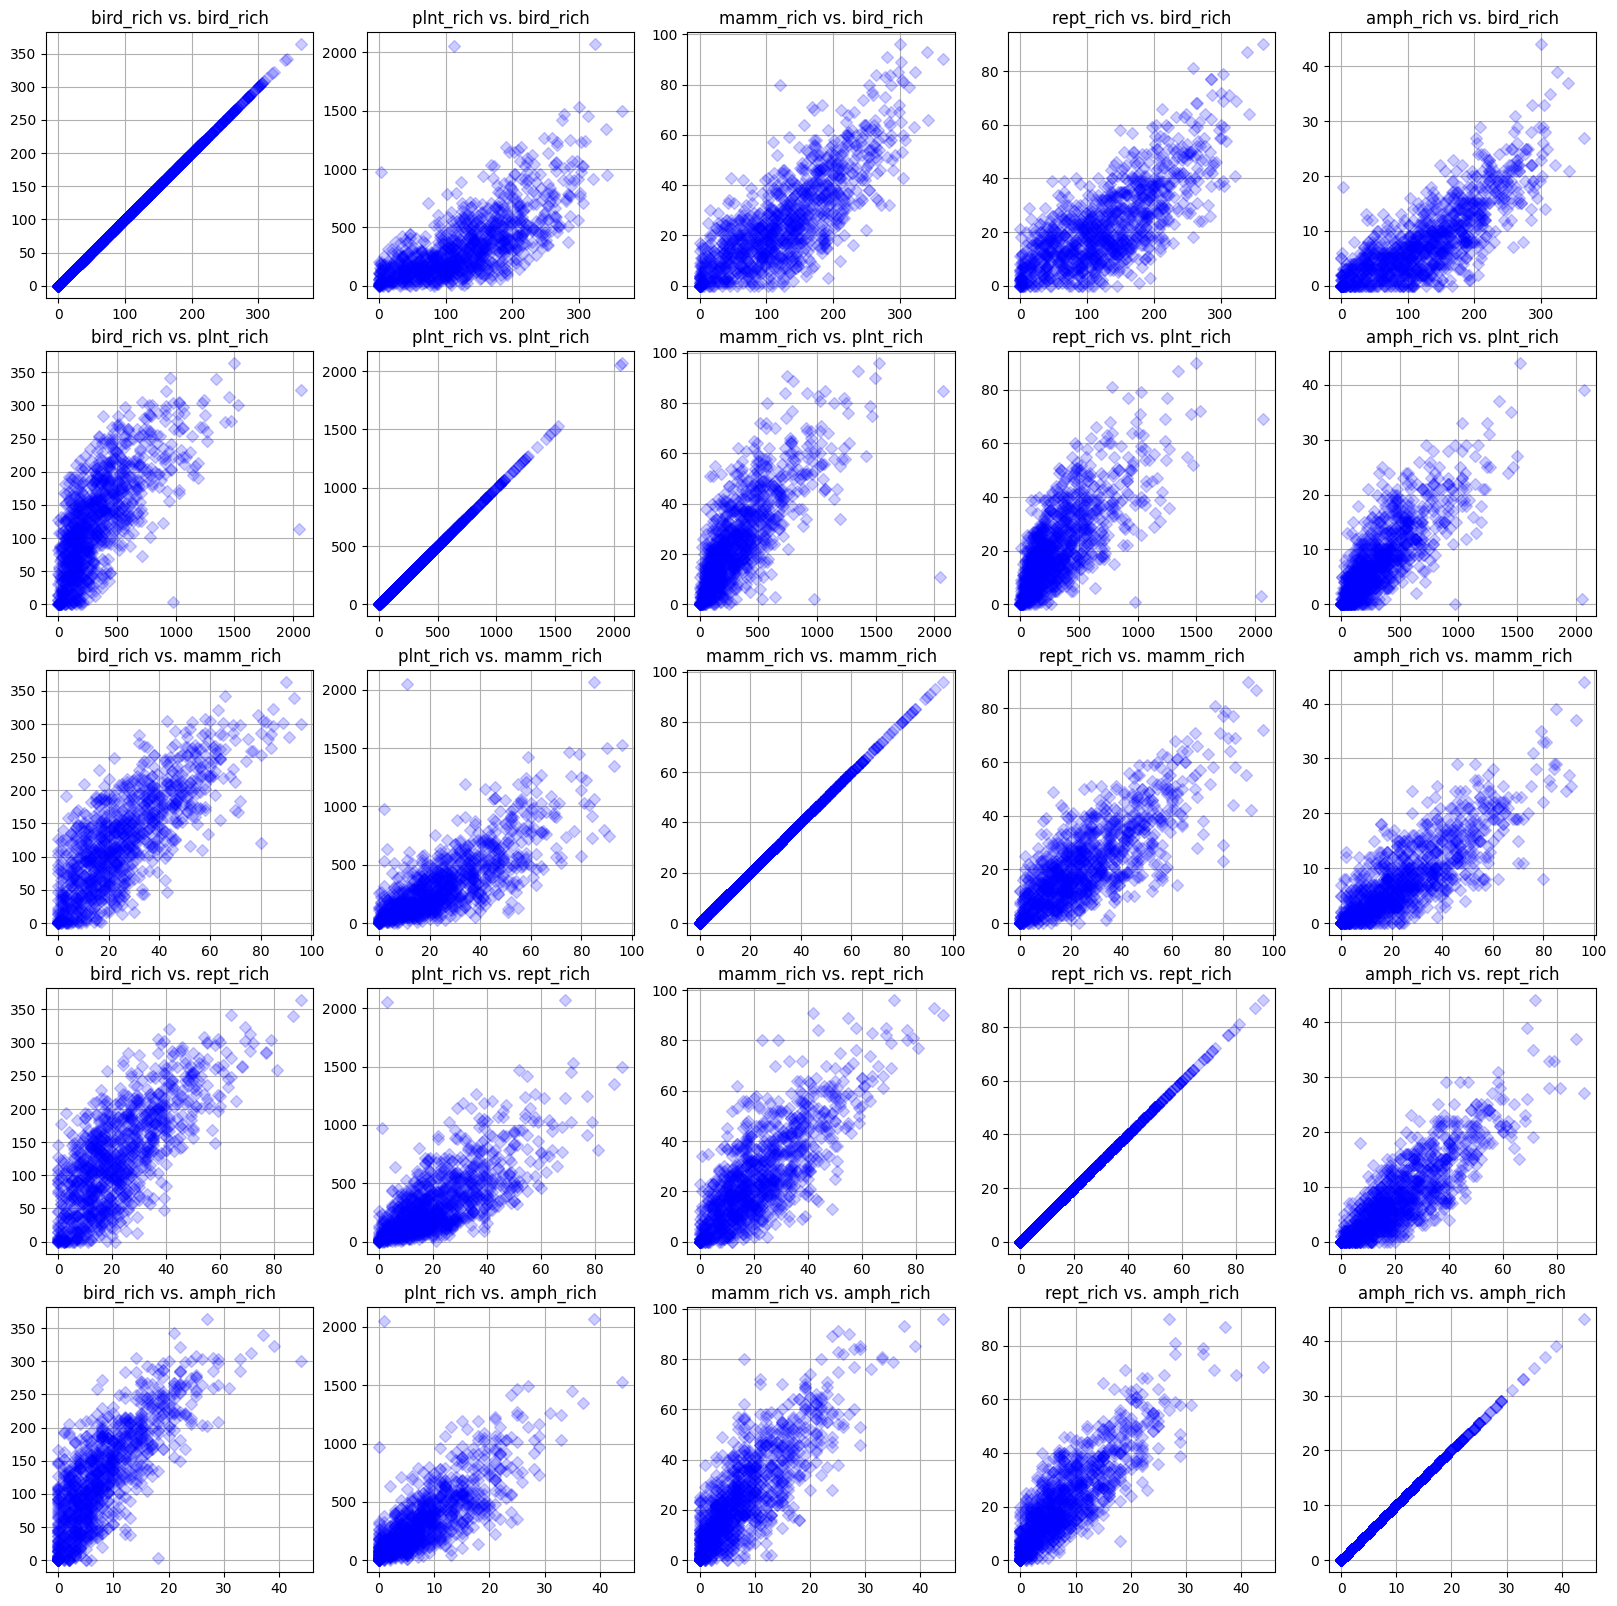

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(20, 20)

fields = ['bird_rich', 'plnt_rich', 'mamm_rich', 'rept_rich', 'amph_rich']

for x in range(0, 5):
    for y in range(0,5):
        ax[x][y].plot(fields[x], fields[y], 'bD', data=grid, alpha=0.2)
        ax[x][y].set_title("{} vs. {}".format(fields[y], fields[x]))
        ax[x][y].grid()

Notice that the diagonals show a single column plotted against itself, which of course produces a perfect line at a 45 degree angle.  This is not very useful.  In an upcoming lecture we will see how to fill these with something a bit more useful but for now, we will simply eliminate it.  I will also change the labeling so that only the top most row and first column get a label.

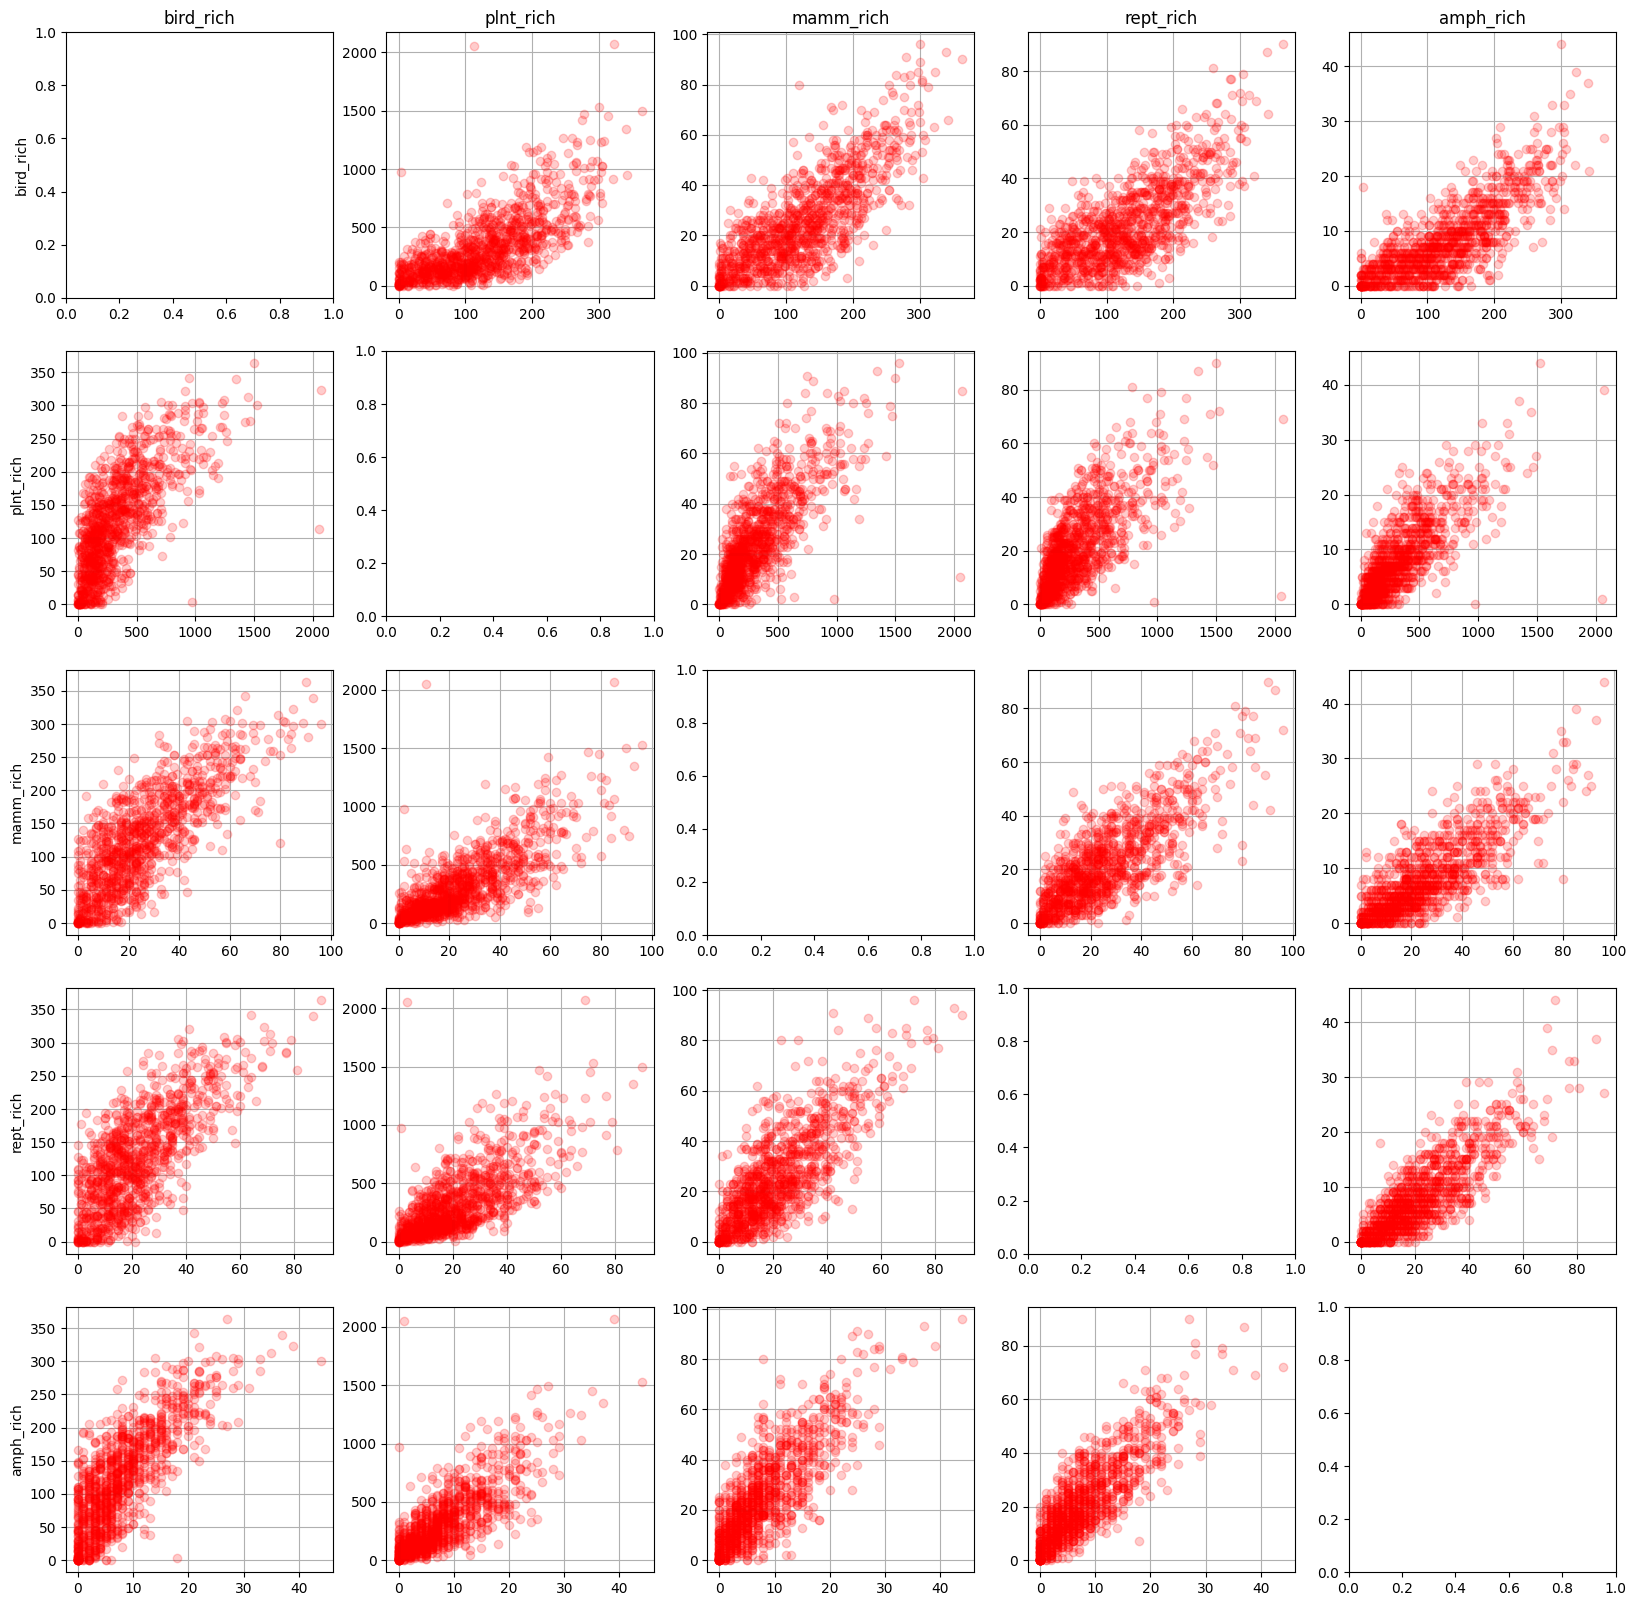

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(20, 20)

fields = ['bird_rich', 'plnt_rich', 'mamm_rich', 'rept_rich', 'amph_rich']

for x in range(0, 5):
    for y in range(0,5):
        if x==0:
            ax[x][y].set_title(fields[y])
        if y==0:
            ax[x][y].set_ylabel(fields[x])
        if x != y:
            ax[x][y].plot(fields[x], fields[y], 'ro', data=grid, alpha=0.2)
            ax[x][y].grid()